# Movie Recommendation System with python

Recommender system is a system that seeks to predict or filter perferences according to the user's choices.Recommender system are utilized in a variety of area including movies,music,news,books,research article,serach queries,social tags,and product in general

# Import libraries

In [1]:
import pandas as pd
import numpy as np

# Get the Data

In [2]:
data=pd.read_csv('ratings.csv')

In [3]:
data.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
df=pd.read_csv('movies.csv')

In [5]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


we can merge them together:

In [6]:
data=pd.merge(data,df,on='movieId')

In [7]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


# EDA

Let's exlore the data a bit and get a look at some of the best rated movies

# Visualization Import

In [8]:
import matplotlib.pyplot as plt
import seaborn  as sb
sb.set_style('white')
%matplotlib inline

Let  create a ratings dataframe with avrage rating and number of ratings:

In [9]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [10]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


Now set the number of ratings column

In [11]:
ratings['num of ratings']=pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


now a few histograms:

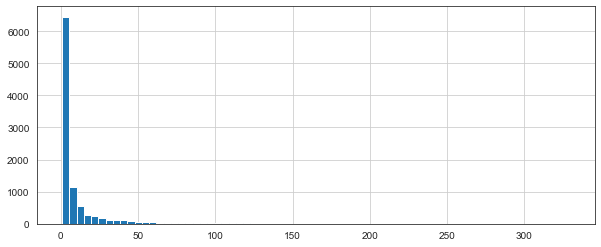

In [12]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

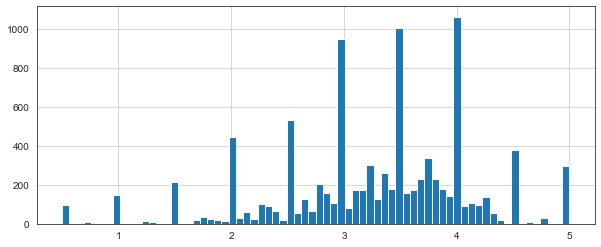

In [13]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

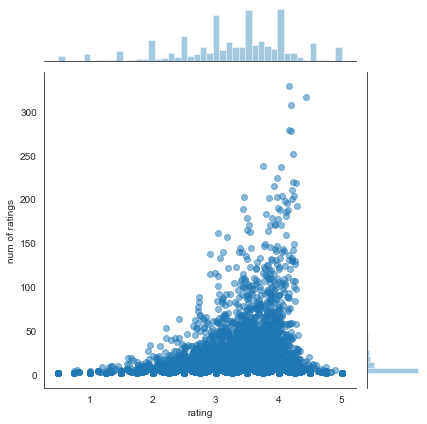

In [14]:
sb.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

# Recommending Similar Movies

Now let's create a matrix that has the user ids on one access and the movie title on another axis.Each cell will then consist of the rating the user gave to that movie.Note there will be a lot of NaN values,because most people have not seen most of the movies.

In [15]:
moviemat=data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most rated movie

In [16]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


Let's choose two movies:forrest gump and Braveheart.

In [17]:
ratings.head()

,rating,num of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Now let's grab the user ratings for those two movies:

In [31]:
forrestgump_user_ratings=moviemat['Forrest Gump (1994)']
jurassicpark_user_ratings=moviemat['Jurassic Park (1993)']
forrestgump_user_ratings.head()

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

We can then use corrwith() method to get correlation between two pandas series:

In [44]:
similar_to_forrestgump=moviemat.corrwith(forrestgump_user_ratings)
similar_to_jurassicpark=moviemat.corrwith(jurassicpark_user_ratings)


C:\Users\this pc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\this pc\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Let's clean this by removing NaN values and using a DataFrame insted of a series:

In [43]:
corr_forrestgump=pd.DataFrame(similar_to_forrestgump,columns=['correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

,correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


Now if we sort the dataframe by correlation,we should get the most similar movies,however note that we get some result that don't really make sense.This is because there are a lot of movies only watched once by users who also watched Forrest Gump (It was the most popular movie)

In [24]:
corr_forrestgump.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


Similar movies as of Forrest Gump

In [45]:
corr_forrestgump.sort_values('correlation',ascending=False).head(10)
corr_forrestgump=corr_forrestgump.join(ratings['num of ratings'])
corr_forrestgump.head()
corr_forrestgump[corr_forrestgump['num of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [40]:
corr_jurassicpark=pd.DataFrame(similar_to_jurassicpark,columns=['correlation'])
corr_jurassicpark.dropna(inplace=True)
corr_jurassicpark=corr_jurassicpark.join(ratings['num of ratings'])
corr_jurassicpark[corr_jurassicpark['num of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,num of ratings
title,,
Jurassic Park (1993),1.000000,238
Outbreak (1995),0.533780,101
Ghostbusters (a.k.a. Ghost Busters) (1984),0.522286,120
"Fugitive, The (1993)",0.460603,190
Indiana Jones and the Temple of Doom (1984),0.456533,108
